# Predict survival of Titanic passengers
Based on the metadata about each passenger, predict whether or not they survived

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data

In [3]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Investigate data

<AxesSubplot:>

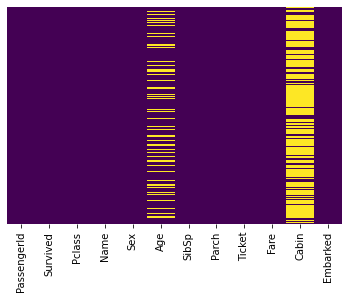

In [6]:
# Check for nulls
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

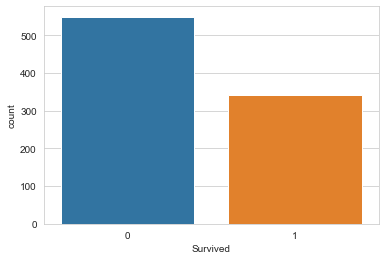

In [8]:
sns.set_style('whitegrid')
# Check distribution of target
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

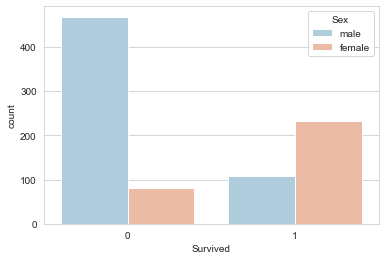

In [9]:
# Compare survival among men and women
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

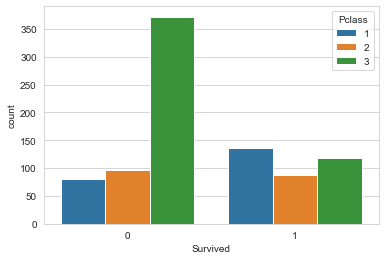

In [10]:
# Compare survival among different classes
sns.countplot(x='Survived', hue='Pclass', data=train)

c:\Users\611391\Documents\Learning\ML Bootcamp\ml_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

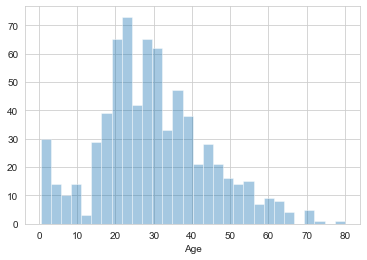

In [11]:
# How old were people on the boat?
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

c:\Users\611391\Documents\Learning\ML Bootcamp\ml_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

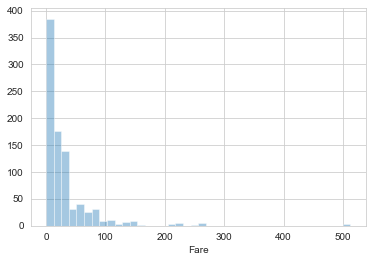

In [15]:
# How much did people pay?
sns.distplot(train['Fare'].dropna(), kde=False, bins=40)

### Clean data

<AxesSubplot:>

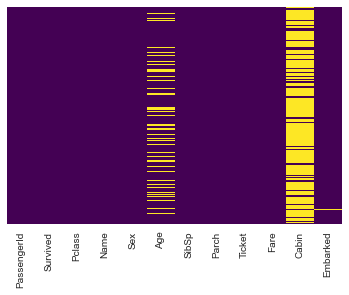

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

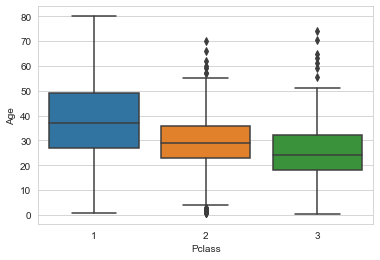

In [21]:
# Check distribution of age by passenger class
sns.boxplot(x='Pclass', y='Age', data=train)

In [22]:
# Define function to impute age based on passenger class
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [ ]:
# Drop "Cabin" column
try:
    train.drop('Cabin', axis=1, inplace=True)
except KeyError:
    print('Cabin col already dropped')
# Drop remaining nulls (embarked)
train.dropna(inplace=True)
# Convert categorical vars to dummies
sex = pd.get_dummies(train['Sex'], drop_first=True)  # avoid multicolinearity by dropping a single column that perfectly predicts another
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, sex, embark], axis=1)  # concatenate in new columns
# Drop string cols
try:
    train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
except KeyError:
    pass

In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Create model

In [37]:
feats = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']
target = 'Survived'
X = train[feats]
y = train[target]

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Fit model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\611391\Documents\Learning\ML Bootcamp\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Get predictions
# Note that we fit the model and got predictions in 3 lines of code! This is representative of the ML process in general. Most of the work occurs during the data cleaning stage!
preds = model.predict(X_test)

# Generate metrics
from sklearn.metrics import classification_report
print('Classfiication report:\n', classification_report(y_test, preds))
from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n', confusion_matrix(y_test, preds))

Classfiication report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294

Confusion matrix:
 [[156  28]
 [ 26  84]]
